#Microproyecto 3 - Analizar la Incidencia Mundial de Tuberculosis
## Integrantes: 
* Isabela Luján Jaramillo.
* Daniel Alexander Naranjo Ríos.

-----------------------------------------

NOTA: NO hicimos modificaciones en el dataframe original, todos los datos son procesados y normalizados en este código.

#Importar las librerías
Antes de empezar a manejar la información es necesario implementar las librerías que se utilizarán:

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
import io
from google.colab import files

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (25, 12)
plt.style.use('ggplot')

#Importar los datos
Después se importará la base de datos a utilizar en el ejercicio

El dataframe fue enviado con el .ipybn, en caso de que haya problemas en este link se encuentra la carpeta con el dataframe:
https://drive.google.com/drive/folders/1BmpFUw9UynOxLlA4QvwAa8NxZScRc5Xg?usp=sharing

In [ ]:
uploaded = files.upload()

Saving Tuberculosis incidence.csv to Tuberculosis incidence (1).csv


#Preprocesamiento de los datos
Al imprimir la las filas y columnas del dataframe se puede ver que no es del tamaño que debería, entonces se procede a imprimir los primeros datos para ver cual es el problema, así es como descubrimos que la primera fila tiene un texto que pandas lee como la única etiqueta de las columnas, además hay algunas columnas vacías y la ultima fila también está vacía.

In [ ]:
dataframe = pd.read_csv(io.BytesIO(uploaded['Tuberculosis incidence.csv']))
dataframe.head(214)

Tuberculosis incidence (per 100,000 people)
HDI Rank (2018) Country                                            2000  NaN 2005  NaN 2010  NaN 2011  NaN 2012  NaN 2013  NaN 2014  NaN 2015  NaN 2016  NaN 2017                                           NaN
170             Afghanistan                                        190.0 NaN 189.0 NaN 189.0 NaN 189.0 NaN 189.0 NaN 189.0 NaN 189.0 NaN 189.0 NaN 189.0 NaN 189.0                                          NaN
69              Albania                                            22.0  NaN 19.0  NaN 17.0  NaN 17.0  NaN 16.0  NaN 19.0  NaN 16.0  NaN 16.0  NaN 16.0  NaN 20.0                                           NaN
82              Algeria                                            74.0  NaN 80.0  NaN 77.0  NaN 73.0  NaN 73.0  NaN 67.0  NaN 72.0  NaN 74.0  NaN 70.0  NaN 70.0                                           NaN
36              Andorra                                            21.0  NaN 15.0  NaN 9.5   NaN 4.1   NaN 13.0  NaN 7.1   NaN 8.7   NaN 5.9   NaN 6.0   NaN 1.5                                            NaN
...                                                                                                                                                                                                         ...
                Least Developed Countries                          298.7 NaN 280.0 NaN 255.9 NaN 249.4 NaN 244.4 NaN 237.9 NaN 232.8 NaN 227.4 NaN 222.2 NaN 217.4                                          NaN
                Small Island Developing States                     129.6 NaN 138.2 NaN 131.8 NaN 131.5 NaN 132.0 NaN 131.8 NaN 130.7 NaN 130.6 NaN 130.2 NaN 128.1                                          NaN
                Organization for Economic Co-operation and Deve... 18.7  NaN 17.4  NaN 15.4  NaN 15.3  NaN 14.6  NaN 13.9  NaN 13.5  NaN 12.9  NaN 12.9  NaN 12.3                                           NaN
                World                                              170.6 NaN 167.0 NaN 153.8 NaN 151.5 NaN 148.6 NaN 145.3 NaN 142.8 NaN 139.7 NaN 136.3 NaN 133.6                                          NaN
NaN             NaN                                                NaN   NaN NaN   NaN NaN   NaN NaN   NaN NaN   NaN NaN   NaN NaN   NaN NaN   NaN NaN   NaN NaN                                            NaN

[214 rows x 1 columns]

Procedemos a leer eldocumento ignorando la primera fila para que el programa tome los títulos de las columnas apropiadamente y se elimina la última fila porque está vacía.

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Tuberculosis incidence.csv']), skiprows=[0]) #Lectura del dataframe ignrorando la primera fila
df.drop(df.tail(1).index,inplace=True)
df.head(214)

,HDI Rank (2018),Country,2000,Unnamed: 3,2005,Unnamed: 5,2010,Unnamed: 7,2011,Unnamed: 9,2012,Unnamed: 11,2013,Unnamed: 13,2014,Unnamed: 15,2015,Unnamed: 17,2016,Unnamed: 19,2017,Unnamed: 21
0,170,Afghanistan,190.0,NaN,189.0,NaN,189.0,NaN,189.0,NaN,189.0,NaN,189.0,NaN,189.0,NaN,189.0,NaN,189.0,NaN,189.0,NaN
1,69,Albania,22.0,NaN,19.0,NaN,17.0,NaN,17.0,NaN,16.0,NaN,19.0,NaN,16.0,NaN,16.0,NaN,16.0,NaN,20.0,NaN
2,82,Algeria,74.0,NaN,80.0,NaN,77.0,NaN,73.0,NaN,73.0,NaN,67.0,NaN,72.0,NaN,74.0,NaN,70.0,NaN,70.0,NaN
3,36,Andorra,21.0,NaN,15.0,NaN,9.5,NaN,4.1,NaN,13.0,NaN,7.1,NaN,8.7,NaN,5.9,NaN,6.0,NaN,1.5,NaN
4,149,Angola,297.0,NaN,368.0,NaN,384.0,NaN,383.0,NaN,380.0,NaN,376.0,NaN,370.0,NaN,366.0,NaN,362.0,NaN,359.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,,Sub-Saharan Africa,343.8,NaN,356.7,NaN,321.2,NaN,309.8,NaN,300.1,NaN,288.3,NaN,279.8,NaN,268.1,NaN,252.9,NaN,243.9,NaN
208,,Least Developed Countries,298.7,NaN,280.0,NaN,255.9,NaN,249.4,NaN,244.4,NaN,237.9,NaN,232.8,NaN,227.4,NaN,222.2,NaN,217.4,NaN
209,,Small Island Developing States,129.6,NaN,138.2,NaN,131.8,NaN,131.5,NaN,132.0,NaN,131.8,NaN,130.7,NaN,130.6,NaN,130.2,NaN,128.1,NaN
210,,Organization for Economic Co-operation and Dev...,18.7,NaN,17.4,NaN,15.4,NaN,15.3,NaN,14.6,NaN,13.9,NaN,13.5,NaN,12.9,NaN,12.9,NaN,12.3,NaN


Ahora los títulos se leen apropiadamente y podemos proceder a borrar las columnas vacías.

In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] #Eliminar todas las columnas con el título unnamed
df.head(212)

,HDI Rank (2018),Country,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017
0,170,Afghanistan,190.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0
1,69,Albania,22.0,19.0,17.0,17.0,16.0,19.0,16.0,16.0,16.0,20.0
2,82,Algeria,74.0,80.0,77.0,73.0,73.0,67.0,72.0,74.0,70.0,70.0
3,36,Andorra,21.0,15.0,9.5,4.1,13.0,7.1,8.7,5.9,6.0,1.5
4,149,Angola,297.0,368.0,384.0,383.0,380.0,376.0,370.0,366.0,362.0,359.0
...,...,...,...,...,...,...,...,...,...,...,...,...
207,,Sub-Saharan Africa,343.8,356.7,321.2,309.8,300.1,288.3,279.8,268.1,252.9,243.9
208,,Least Developed Countries,298.7,280.0,255.9,249.4,244.4,237.9,232.8,227.4,222.2,217.4
209,,Small Island Developing States,129.6,138.2,131.8,131.5,132.0,131.8,130.7,130.6,130.2,128.1
210,,Organization for Economic Co-operation and Dev...,18.7,17.4,15.4,15.3,14.6,13.9,13.5,12.9,12.9,12.3


Ahora buscamos los valores nulos que queden en el dataset.

In [ ]:
df.isnull().sum()

HDI Rank (2018)    2
Country            0
2000               0
2005               0
2010               0
2011               0
2012               0
2013               0
2014               0
2015               0
2016               0
2017               0
dtype: int64

Notamos que hay 2 datos nulos en la primera columna, entonces imprimimos las filas correspondientes a estos datos nulos para ver de qué se trata.

In [ ]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

print(rows_with_NaN)

    HDI Rank (2018)            Country 2000 2005 2010  ... 2013 2014 2015 2016 2017
195             NaN  Human Development        ..   ..  ...   ..   ..   ..   ..   ..
201             NaN            Regions        ..   ..  ...   ..   ..   ..   ..   ..

[2 rows x 12 columns]


Los valores nulos pertenecen a nombres que no son países y tienen la función de cambiar el conjunto de valores que se estaba estudiando, es decir, las primeras líneas son datos por país, luego hay información sobre el desarrollo humano y luego hay una divisón por regiones, pero todos están en la columna de países. Además, se tiene que hay ciertas celdas y filas llenas con el caracter "..", por lo que se reemplazarán dichos caracteres por -1 para poder trabajar con datos numéricos, y además se divirá el dataframe original para poder operar con toda la información de manera correcta.

In [ ]:
df.replace('..',-1, inplace=True)
df.iloc[[116]]

,HDI Rank (2018),Country,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017
116,52,Montenegro,-1,29.0,20.0,20.0,18.0,22.0,21.0,15.0,16.0,14.0


##División del dataset
A continuación se crean varios dataframes, cada uno enfocado a una de las subtablas encontradas en la base de datos

In [ ]:
#Se crea un dataframe con solo los paises
df_country = df.loc[0:193]
df_country_aux = df_country.pop('HDI Rank (2018)')
df_country['HDI Rank (2018)']=df_country_aux
df_country

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Country,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,HDI Rank (2018)
0,Afghanistan,190.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0,170
1,Albania,22.0,19.0,17.0,17.0,16.0,19.0,16.0,16.0,16.0,20.0,69
2,Algeria,74.0,80.0,77.0,73.0,73.0,67.0,72.0,74.0,70.0,70.0,82
3,Andorra,21.0,15.0,9.5,4.1,13.0,7.1,8.7,5.9,6.0,1.5,36
4,Angola,297.0,368.0,384.0,383.0,380.0,376.0,370.0,366.0,362.0,359.0,149
...,...,...,...,...,...,...,...,...,...,...,...,...
189,Venezuela (Bolivarian Republic of),33.0,32.0,28.0,27.0,27.0,27.0,26.0,29.0,32.0,42.0,96
190,Viet Nam,197.0,176.0,155.0,151.0,147.0,144.0,140.0,137.0,133.0,129.0,118
191,Yemen,116.0,80.0,52.0,50.0,48.0,48.0,48.0,48.0,48.0,48.0,177
192,Zambia,759.0,602.0,495.0,475.0,456.0,437.0,406.0,391.0,376.0,361.0,143


In [ ]:
#Se crea un dataframe con solo el desarrollo humano
df_hdev = df.loc[196:200]
df_hdev = df_hdev.rename(columns={'Country': 'Human Development level'})
df_hdev.head()

,HDI Rank (2018),Human Development level,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017
196,,Very high human development,32.9,30.2,26.8,26.1,24.9,23.7,22.8,21.7,21.2,20.1
197,,High human development,144.0,138.5,127.5,126.3,124.4,121.3,119.4,116.9,112.9,111.3
198,,Medium human development,279.1,274.2,247.7,242.5,236.5,231.1,226.0,220.5,215.1,209.3
199,,Low human development,276.9,255.4,230.6,224.6,220.1,214.0,210.2,205.5,201.2,197.2
200,,Developing Countries,203.8,198.3,181.5,178.6,175.1,171.1,168.0,164.3,160.1,156.9


In [ ]:
#Se crea un dataframe con solo las regiones
df_regions = df.loc[202:211]
df_regions = df_regions.rename(columns={'Country': 'Regions'})
df_regions.head()

,HDI Rank (2018),Regions,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017
202,,Arab States,67.6,60.5,56.0,54.4,53.7,52.0,51.2,50.9,49.6,48.0
203,,East Asia and the Pacific,184.7,169.5,155.2,154.2,152.6,149.9,148.3,146.4,144.8,143.6
204,,Europe and Central Asia,93.3,94.0,76.1,73.2,68.2,64.4,60.9,57.2,54.4,52.1
205,,Latin America and the Caribbean,53.9,48.4,42.7,43.1,42.4,42.0,41.2,40.9,41.2,42.3
206,,South Asia,263.2,256.0,233.4,229.1,224.1,219.7,215.5,211.3,206.7,201.6


#Selección de variables

A continuación se eligen las variables a analizar de cada uno de los dataframes creados.


Primero se transpone la información, para sacar la media de cada país ordenados por columnas para facilitar el cálculo.

In [ ]:
#Separando la información por año

plt.rcParams['figure.figsize'] = (25, 12)

df_to_hist_country = df_country.iloc[:,1:]
df_to_hist_country_t = df_to_hist_country.transpose()
df_to_hist_country = df_to_hist_country.apply(pd.to_numeric)

df_to_hist_country_t.columns=df_country.iloc[:,0]
df_to_hist_country_t = df_to_hist_country_t.apply(pd.to_numeric)

In [ ]:
print((df_to_hist_country_t==-1).sum().sort_values(ascending=False))

Country
South Sudan                            3
Korea (Democratic People's Rep. of)    1
Tuvalu                                 1
San Marino                             1
Serbia                                 1
                                      ..
Netherlands                            0
Nepal                                  0
Namibia                                0
Myanmar                                0
Afghanistan                            0
Length: 194, dtype: int64


Se reemplaza cada -1 por la media mas un valor aleatorio entre 0 y la desviación estándar.

In [ ]:
for country_name in df_to_hist_country_t.columns:
  df_to_hist_country_t.loc[(df_to_hist_country_t[country_name]==-1), country_name]=df_to_hist_country_t[country_name].mean()+np.random.uniform(0,df_to_hist_country_t[country_name].std())
print((df_to_hist_country_t==-1).sum().sort_values(ascending=False))

Country
Zimbabwe         0
Dominica         0
Guinea-Bissau    0
Guinea           0
Guatemala        0
                ..
Niger            0
Nicaragua        0
New Zealand      0
Netherlands      0
Afghanistan      0
Length: 194, dtype: int64


Luego de normalizar los datos se vuelve a transponer la tabla para usarala en su forma original.

In [ ]:
df_to_hist_country = df_to_hist_country_t.transpose()
df_to_hist_country

,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,HDI Rank (2018)
Country,,,,,,,,,,,
Afghanistan,190.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0,170.0
Albania,22.0,19.0,17.0,17.0,16.0,19.0,16.0,16.0,16.0,20.0,69.0
Algeria,74.0,80.0,77.0,73.0,73.0,67.0,72.0,74.0,70.0,70.0,82.0
Andorra,21.0,15.0,9.5,4.1,13.0,7.1,8.7,5.9,6.0,1.5,36.0
Angola,297.0,368.0,384.0,383.0,380.0,376.0,370.0,366.0,362.0,359.0,149.0
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),33.0,32.0,28.0,27.0,27.0,27.0,26.0,29.0,32.0,42.0,96.0
Viet Nam,197.0,176.0,155.0,151.0,147.0,144.0,140.0,137.0,133.0,129.0,118.0
Yemen,116.0,80.0,52.0,50.0,48.0,48.0,48.0,48.0,48.0,48.0,177.0


Ahora dividimos los índices de desarrollo humano en grupos y le asignamos a cada país su respectivo grupo siendo:

---
1 = Very high human development

2 = High human development

3 = Medium human development

4 = Low human development


In [ ]:
column=['HDI Rank (2018)']  
for c in column:
    
    Range=c+'_RANGE'
    dataframe[Range]=0
    df_to_hist_country.loc[((df_to_hist_country[c]>=0)&(df_to_hist_country[c]<=50)),Range]=1
    df_to_hist_country.loc[((df_to_hist_country[c]>50)&(df_to_hist_country[c]<=100)),Range]=2
    df_to_hist_country.loc[((df_to_hist_country[c]>100)&(df_to_hist_country[c]<=150)),Range]=3
    df_to_hist_country.loc[((df_to_hist_country[c]>150)),Range]=4

df_to_hist_country

,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,HDI Rank (2018),HDI Rank (2018)_RANGE
Country,,,,,,,,,,,,
Afghanistan,190.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0,189.0,170.0,4.0
Albania,22.0,19.0,17.0,17.0,16.0,19.0,16.0,16.0,16.0,20.0,69.0,2.0
Algeria,74.0,80.0,77.0,73.0,73.0,67.0,72.0,74.0,70.0,70.0,82.0,2.0
Andorra,21.0,15.0,9.5,4.1,13.0,7.1,8.7,5.9,6.0,1.5,36.0,1.0
Angola,297.0,368.0,384.0,383.0,380.0,376.0,370.0,366.0,362.0,359.0,149.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),33.0,32.0,28.0,27.0,27.0,27.0,26.0,29.0,32.0,42.0,96.0,2.0
Viet Nam,197.0,176.0,155.0,151.0,147.0,144.0,140.0,137.0,133.0,129.0,118.0,3.0
Yemen,116.0,80.0,52.0,50.0,48.0,48.0,48.0,48.0,48.0,48.0,177.0,4.0


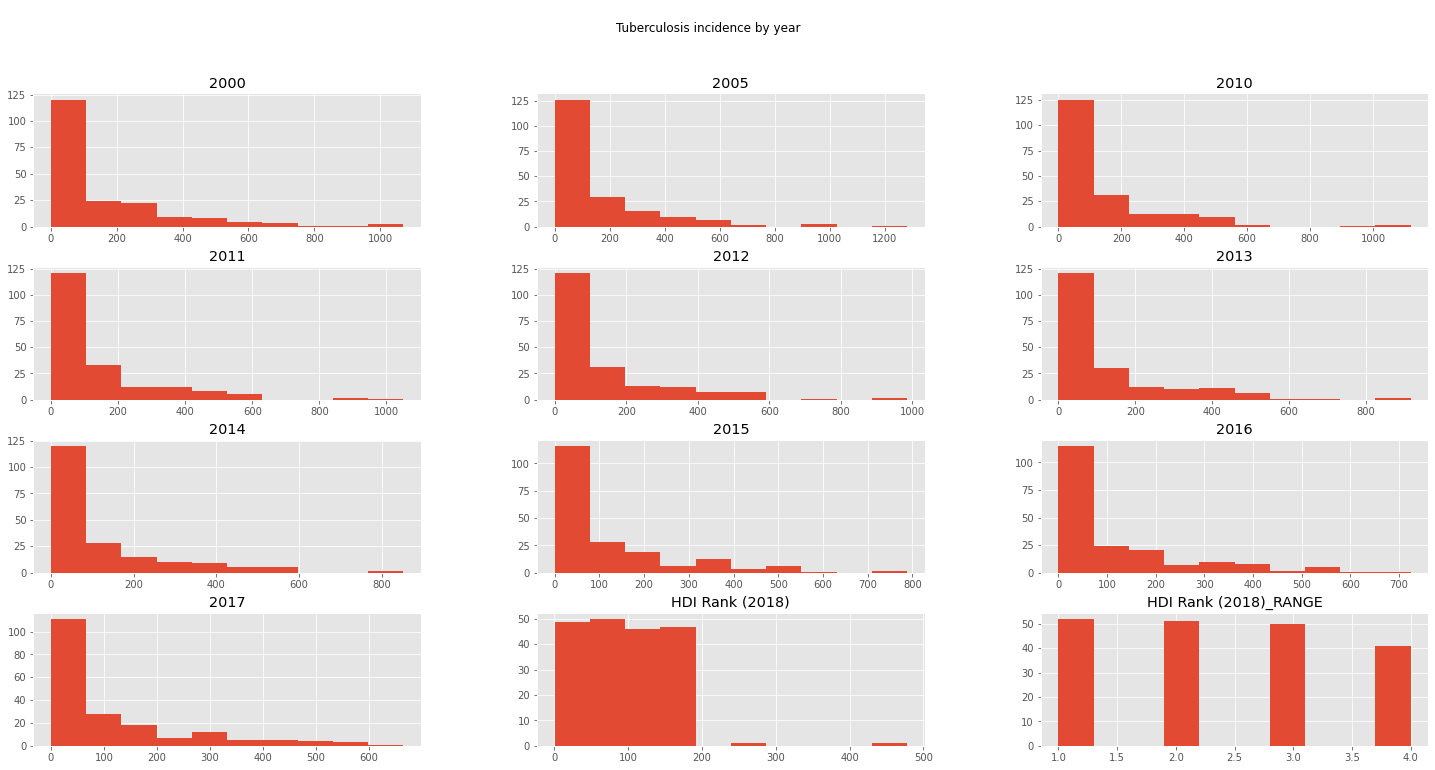

,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,HDI Rank (2018),HDI Rank (2018)_RANGE
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,150.542289,148.485589,135.223217,130.043814,126.589691,123.218557,118.994845,116.224742,113.874227,109.871134,97.506756,2.412371
std,196.887128,205.568290,188.164972,177.200132,169.199930,163.189552,156.201044,151.894990,146.391207,141.193992,62.822699,1.098775
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.844877,1.000000
25%,22.000000,17.000000,16.250000,16.000000,14.250000,13.250000,14.000000,13.000000,12.000000,12.000000,48.250000,1.000000
50%,67.000000,67.000000,53.000000,55.500000,53.000000,54.000000,53.500000,51.000000,49.500000,47.500000,95.000000,2.000000
75%,218.250000,191.750000,177.201045,172.500000,172.750000,169.500000,164.250000,159.000000,159.750000,152.000000,143.750000,3.000000
max,1070.000000,1280.000000,1120.000000,1050.000000,985.000000,916.000000,852.000000,788.000000,724.000000,665.000000,477.631727,4.000000


In [ ]:
#Separando la información por año

plt.rcParams['figure.figsize'] = (25, 12)
df_to_hist_country.hist() #Se crea la gráfica
pl.suptitle("\nTuberculosis incidence by year")
plt.show()
df_to_hist_country.describe()

In [ ]:
print(df_to_hist_country.groupby('HDI Rank (2018)_RANGE').size())
plt.show()

HDI Rank (2018)_RANGE
1.0    52
2.0    51
3.0    50
4.0    41
dtype: int64


## Definición de las funciones del método de codo y de GAP

Primero que todo, como se va a tener que calcular la gráfica de codo, el estadistico de GAP y la gráfica de los respectivos clusters para cada dataset, se procede a plantear funciones que lo hagan para evitar código duplicado en el futuro

In [ ]:
#Función para hacer la gráfica de codo
def elbow_chart(n, data):
  #kmeans = calc_kmeans(n)
  Nc = range(1, n)
  kmeans = [KMeans(n_clusters=i) for i in Nc]
  kmeans
  score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]
  score
  plt.plot(Nc,score)
  plt.xlabel('Number of Clusters')
  plt.ylabel('Score')
  plt.title('Elbow Curve')
  plt.show()

In [ ]:
#Funcion para calcular el estadistico de GAP
def est_GAP(data, nrefs, maxClusters): 
  gaps = np.zeros((len(range(1, maxClusters)),))
  resultsdf = pd.DataFrame({'clusterCount': [], 'gap': []})
  for gap_index, k in enumerate(range(1, maxClusters)):
      refDisps = np.zeros(nrefs) # Holder for reference dispersion results
      # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
      for i in range(nrefs):
          np.random.seed(0)
          randomReference = np.random.random_sample(size=data.shape) # Create new random reference set
          km = KMeans(k) # Fit to it
          km.fit(randomReference)

          refDisp = km.inertia_
          refDisps[i] = refDisp
          
      km = KMeans(k) # Fit cluster to original data and create dispersion
      km.fit(data)

      origDisp = km.inertia_

      gap = np.log(np.mean(refDisps)) - np.log(origDisp) # Calculate gap statistic
      gaps[gap_index] = gap # Assign this loop's gap statistic to gaps

      resultsdf = resultsdf.append({'clusterCount': k, 'gap': gap}, ignore_index=True)
  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal
  k,resultsdf = (gaps.argmax() + 1, resultsdf)

  n_clusters = k
  return n_clusters

In [ ]:
#Funcion para graficar los clusters sugeridos
def plot_clusters(data, colors):
  kmeans = KMeans(n_clusters).fit(data)
  centroids = kmeans.cluster_centers_
  # Predicting the clusters
  labels = kmeans.predict(data)
  # Getting the cluster centers
  C = kmeans.cluster_centers_
  colores=colors
  asignar=[]
  for row in labels:
      asignar.append(colores[row])
  
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=asignar,s=60)
  ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
  return asignar

# Clusterización

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


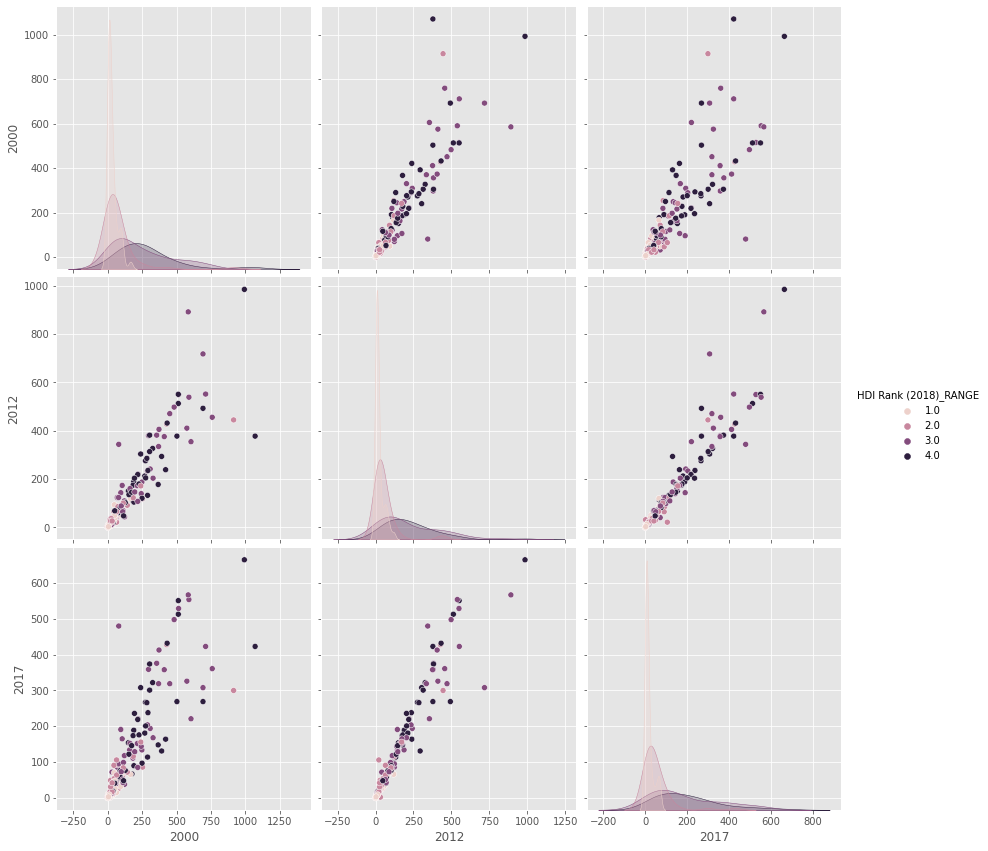

In [ ]:
sb.pairplot(df_to_hist_country.dropna(), hue='HDI Rank (2018)_RANGE',size=4,vars=["2000","2012","2017"],kind='scatter')

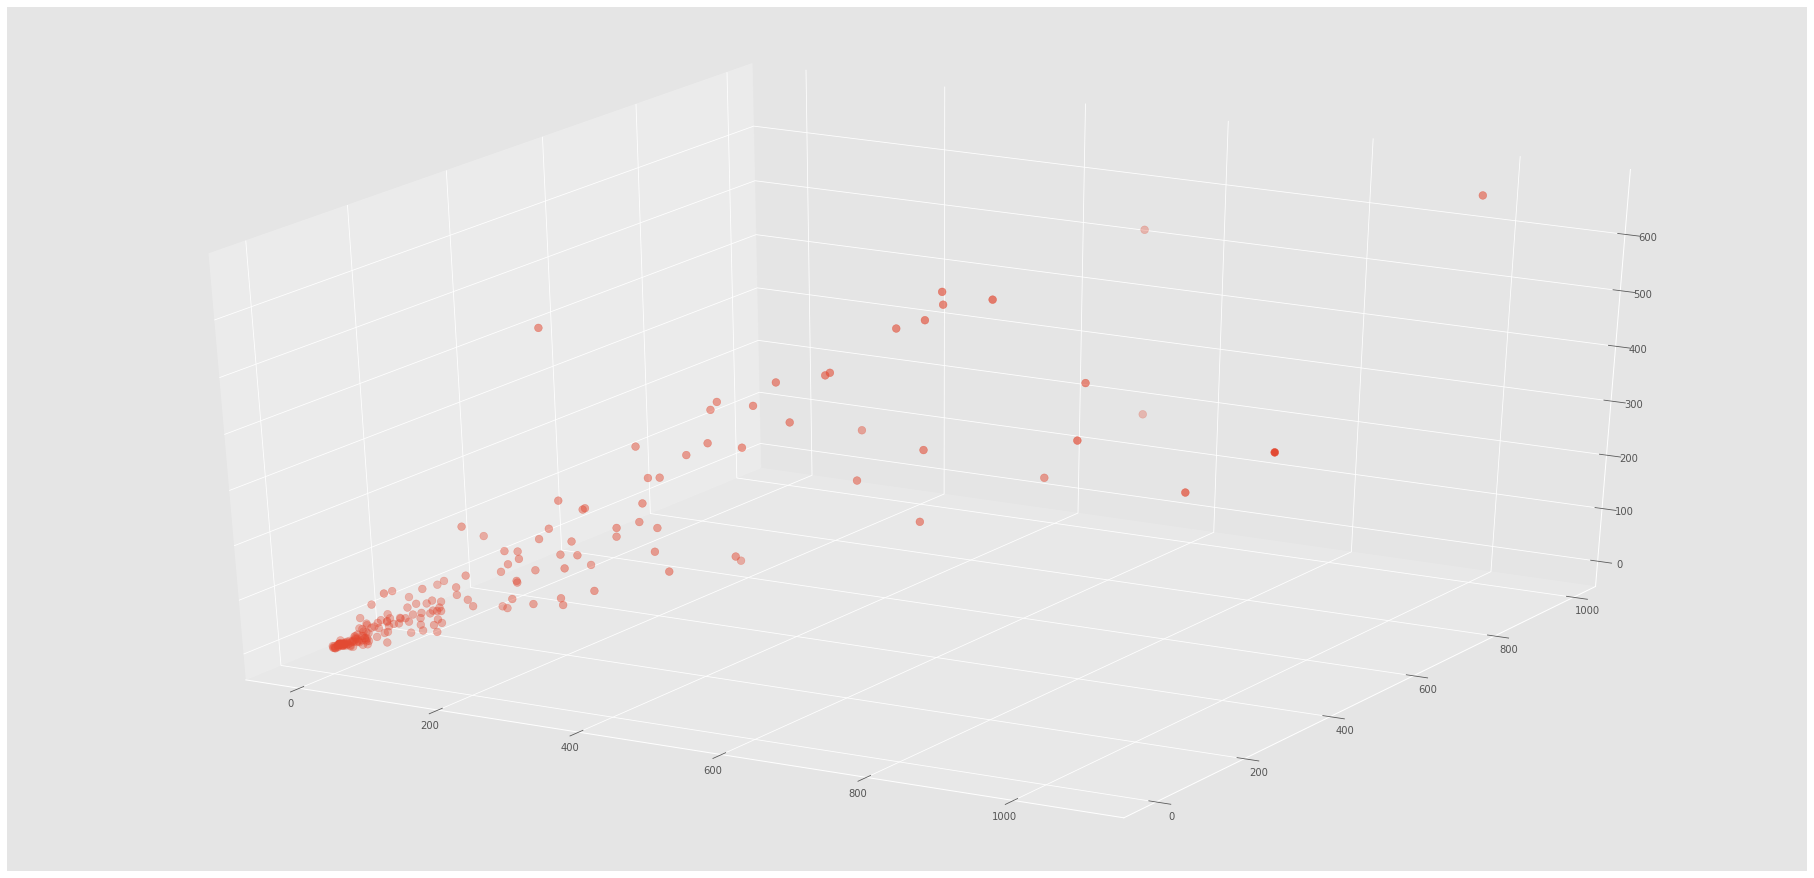

In [ ]:
df_to_hist_country_arr = np.array(df_to_hist_country[["2000","2012","2017"]])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_to_hist_country_arr[:, 0], df_to_hist_country_arr[:, 1], df_to_hist_country_arr[:, 2],s=60)

Se grafica la dispersión de los datos y se puede ver que a una leve tendencia pero cuando se acaba ese punto de tendencia los datos están bien repartidos, entonces se procede a usar el metodo de codo y de GAP para definir la cantidad declusters a realizar.

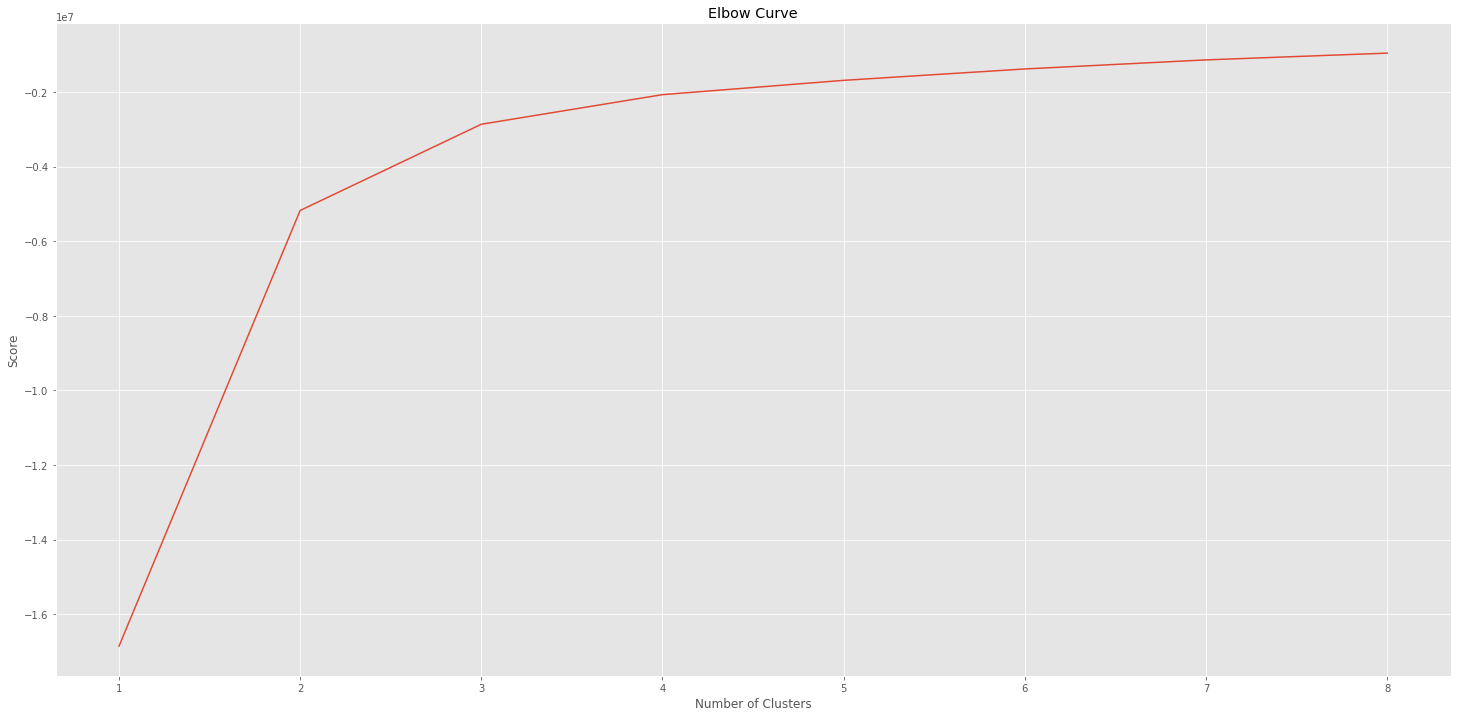

In [ ]:
elbow_chart(9, df_to_hist_country_arr)

In [ ]:
n_clusters = est_GAP(df_to_hist_country_arr, 1, 4)
n_clusters

3

El método del codo dio como resultadouna curva con inflexión hasta 4 aproximadamente entonces se usa el 4 como límite para luego calcular la cantidad de clusters con el método de GAP, luego de usar ambos métodos se concluye que el numero de clusters recomendado es 3.
Luego se grafica el area y los centroides de cada cluster.

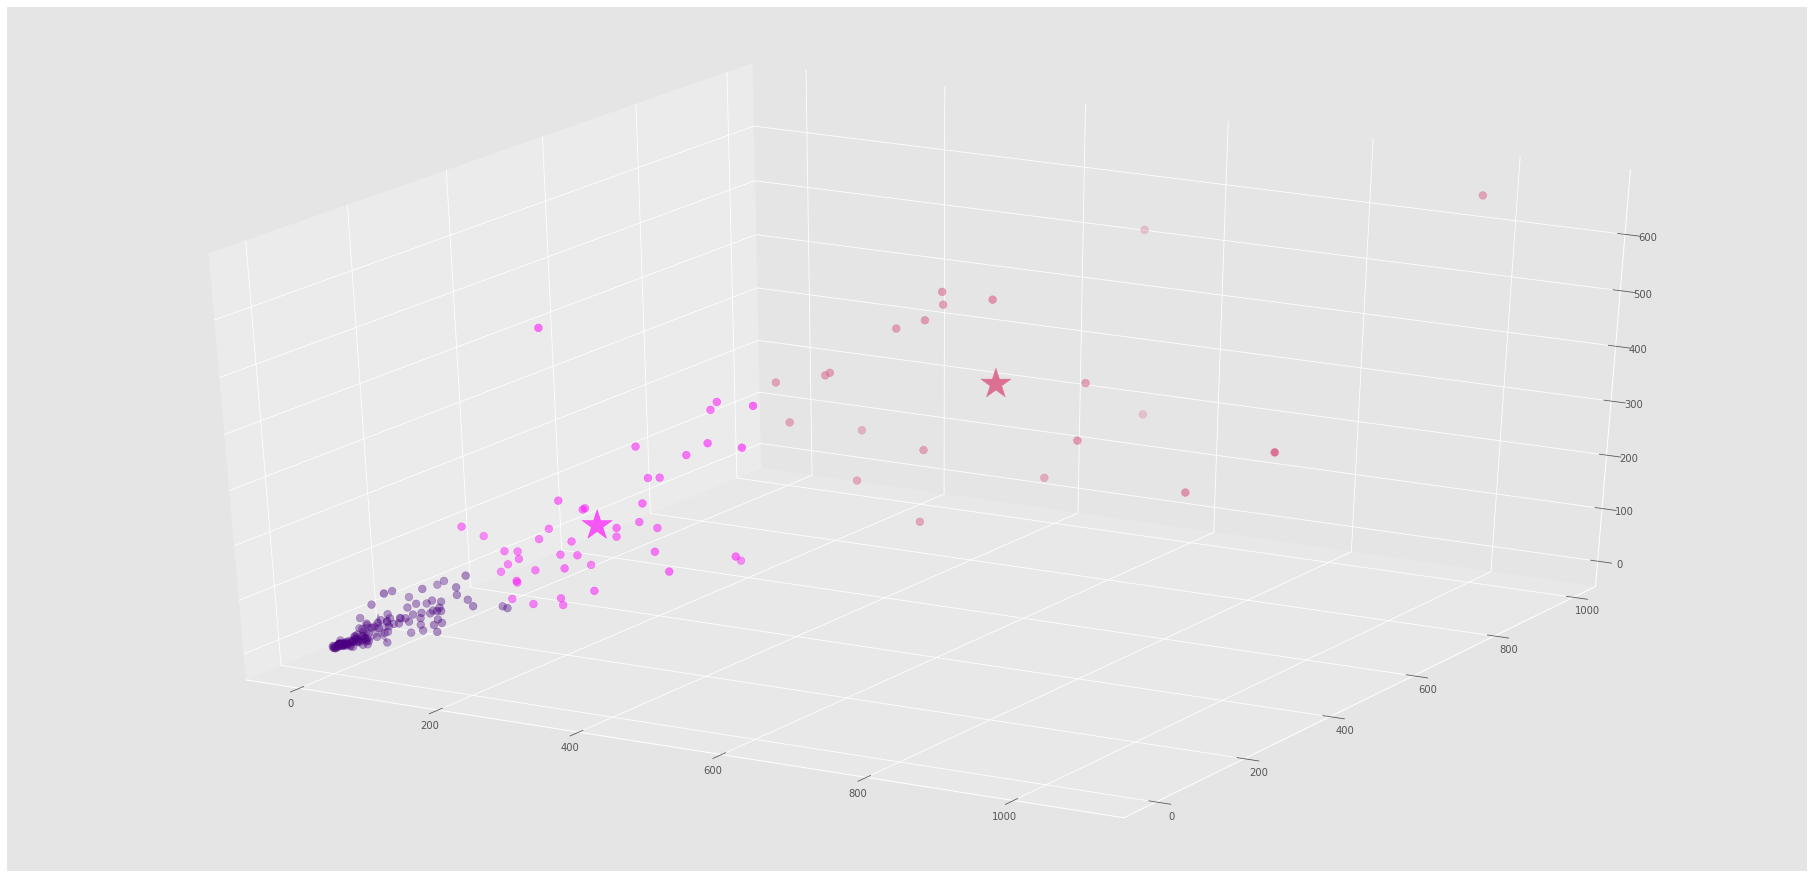

In [ ]:
#n_clusters = 4
asignar = plot_clusters(df_to_hist_country_arr, ["magenta", "indigo", "palevioletred"]) 

Se sacan los centroides para proceder a graficar el área y los centroides de los clsuters haciendo una comparación entre dos de las tres variables.

In [ ]:
kmeans = KMeans(n_clusters).fit(df_to_hist_country_arr)
C = kmeans.cluster_centers_
color = ["magenta", "indigo", "palevioletred"]
print(C)

[[244.38191316 210.79545455 197.59090909]
 [ 43.76498545  34.54573643  30.18604651]
 [609.84365137 515.57142857 415.57142857]]


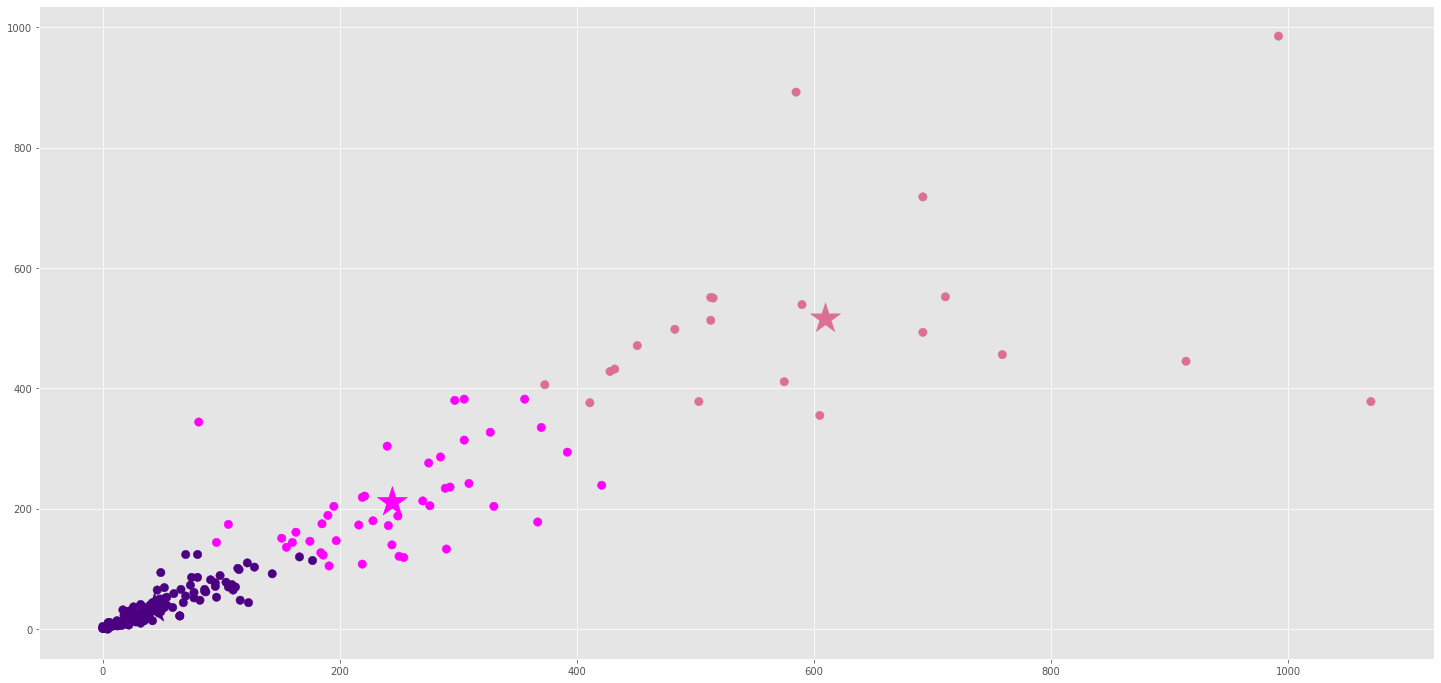

In [ ]:
f1 = df_to_hist_country["2000"].values
f2 = df_to_hist_country["2012"].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=color, s=1000)
plt.show()

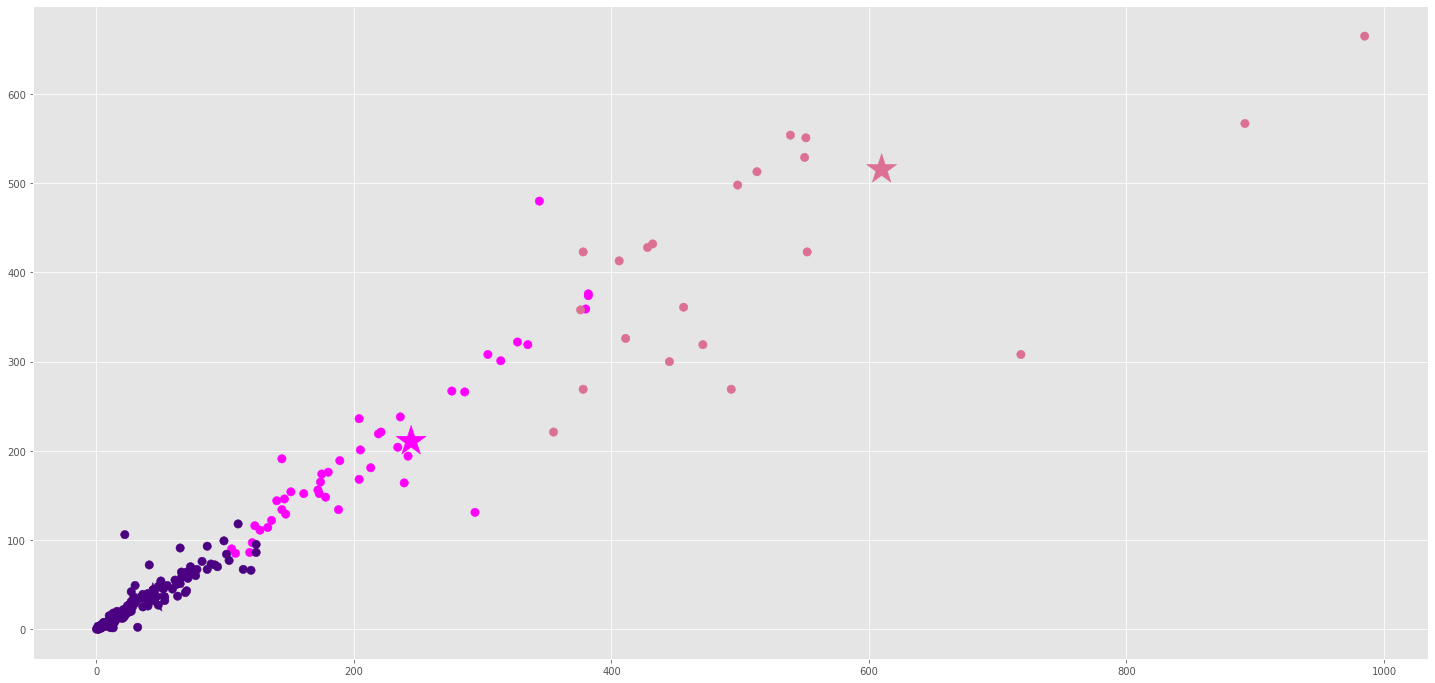

In [ ]:
f1 = df_to_hist_country["2012"].values
f2 = df_to_hist_country["2017"].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=color, s=1000)
plt.show()

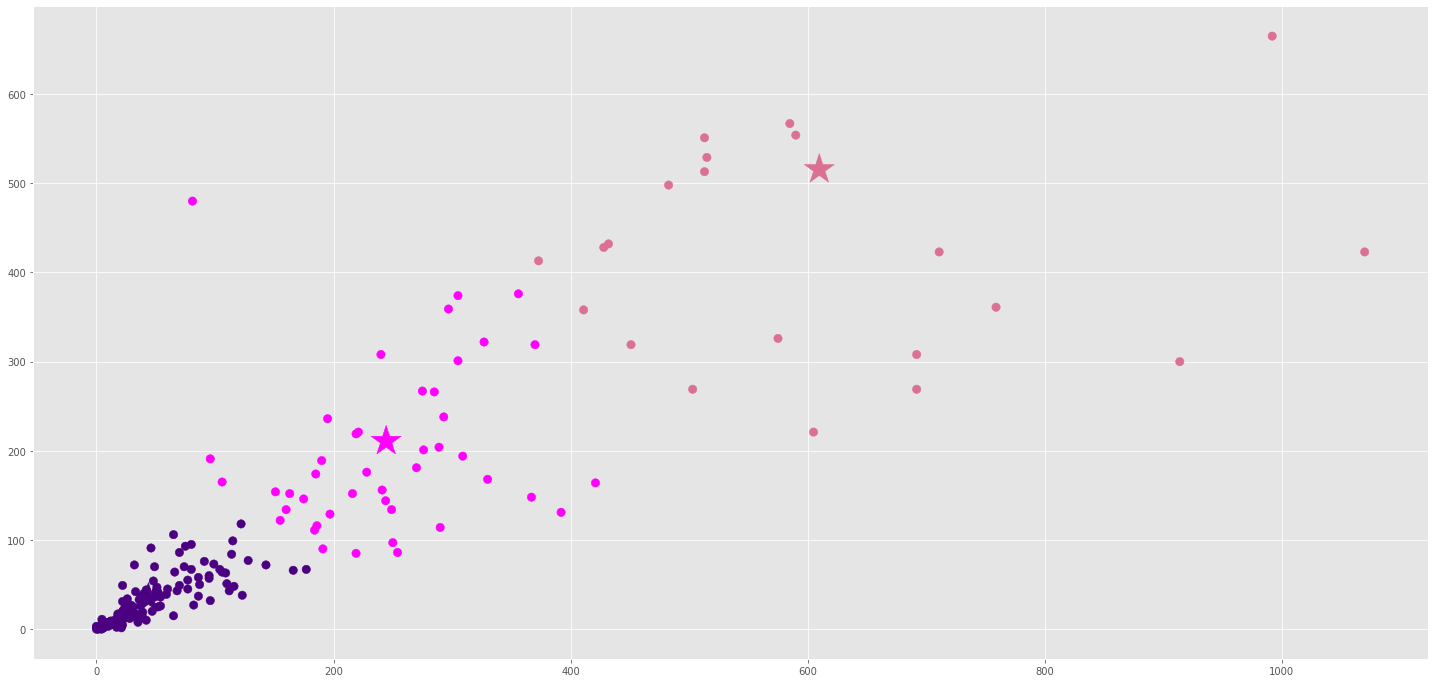

In [ ]:
f1 = df_to_hist_country["2000"].values
f2 = df_to_hist_country["2017"].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=color, s=1000)
plt.show()

Se concluye que los clusters están bien repartidos y se comportan de forma consistente en cada eje por lo que procedemos a estudiar casos específicos de los datos para sacar conclusiones.

Elegimos un país de cada cluster.

In [ ]:
cluster_index=1
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df_to_hist_country_arr)
for i in closest:
  print("\nCluster n° ",cluster_index,":", df_to_hist_country.iloc[i].name)
  print(df_to_hist_country.iloc[i])


Cluster n°  1 : Haiti
2000                     270.0
2005                     272.0
2010                     229.0
2011                     220.0
2012                     213.0
2013                     206.0
2014                     200.0
2015                     194.0
2016                     188.0
2017                     181.0
HDI Rank (2018)          169.0
HDI Rank (2018)_RANGE      4.0
Name: Haiti, dtype: float64

Cluster n°  1 : Comoros
2000                      39.0
2005                      36.0
2010                      33.0
2011                      34.0
2012                      34.0
2013                      34.0
2014                      35.0
2015                      35.0
2016                      35.0
2017                      35.0
HDI Rank (2018)          156.0
HDI Rank (2018)_RANGE      4.0
Name: Comoros, dtype: float64

Cluster n°  1 : Namibia
2000                     711.0
2005                     918.0
2010                     649.0
2011                     610.0
2

## Porcentaje de tuberculosis en latinoamérica

Evaluamos la cantidad de tuberculosis en Latinoamérica para ver en que cluster está ubicado.

In [ ]:
#Tuberculosis en Latinoamerica y el Caribe: 53.9, 48.4, 42.7, 43.1, 42.4, 42, 41.2, 40.9, 41.2, 42.3
#Tuberculosis en Latinoamerica y el Caribe en los años evaluados: 53.9, 42.4, 42.3

test = np.array([[53.9, 42.4, 42.3]]) 

new_labels = kmeans.predict(test)
print("América Latina y el Caribe están en el cluster:",new_labels)

América Latina y el Caribe están en el cluster: [1]


## Paises que hacen parte del cluster con los peores indices

Se muestran todos los países pertenecientes al cluster 3, que es el cluster con los peores porcentajes de tuberculosis.

In [ ]:
worst_cluster = 2   #Se le resta 1 al peor cluster pues python empieza a contar desde 0
print("Los paises con los peores índices son:\n")
for i in range (0, len(kmeans.labels_)):  #se recorre un arreglo con las etiquetas de los clusters y se revisa que item está en dicho cluster
  if kmeans.labels_[i] == worst_cluster:
    print(df_to_hist_country.index[i])
print("\nY pertenecen al cluster número ",worst_cluster+1)

Los paises con los peores índices son:

Botswana
Cambodia
Central African Republic
Djibouti
Eswatini (Kingdom of)
Gabon
Kenya
Kiribati
Korea (Democratic People's Rep. of)
Lesotho
Mongolia
Mozambique
Myanmar
Namibia
Papua New Guinea
Philippines
South Africa
Tanzania (United Republic of)
Timor-Leste
Zambia
Zimbabwe

Y pertenecen al cluster número  3


Se muestra la tabla ordenada de peor a mejor HDR Rank y se busca la primera aparición de un país de cada región. Debido a que en el dataframe las regiones no están relacionadas con los países y las opciones para relacionarlos son buscarlos por internet y ponerlos manualmente en el archivo .csv para hacerlo con exactitud, pero sería muy ineficiente, o hacerlo con rangos usando la información de la tuberculosis pero este método daría resultados muy inexactos, entonces optamos por seleccionar la primera aparición del país con peor índice de la región manualmente con base en la lista.

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df_to_hist_country[['HDI Rank (2018)', 'HDI Rank (2018)_RANGE']].sort_values(by=['HDI Rank (2018)'], ascending=False)

,HDI Rank (2018),HDI Rank (2018)_RANGE
Country,,
Korea (Democratic People's Rep. of),477.631727,4.0
Somalia,281.715670,4.0
Niger,189.000000,4.0
Central African Republic,188.000000,4.0
Chad,187.000000,4.0
South Sudan,186.000000,4.0
Burundi,185.000000,4.0
Mali,184.000000,4.0
Burkina Faso,182.000000,4.0


In [ ]:
sample_dict = {'Arab States':'Somalia',
                'East Asia and the Pacific':"Korea (Democratic People's Rep. of)",
                'Europe and Central Asia':'Turkmenistan',
                'Latin America and the Caribbean':'Honduras', 
                'South Asia':'Afghanistan', 
                'Sub-Saharan Africa':'Niger',
               }
print("Peores países por regiones\n")
for i in sample_dict.keys():
  print(i,"-", sample_dict[i],":")
  print(df_to_hist_country.loc[sample_dict[i]])
  print("\n")

Peores países por regiones

Arab States - Somalia :
2000                     285.00000
2005                     285.00000
2010                     286.00000
2011                     286.00000
2012                     286.00000
2013                     285.00000
2014                     274.00000
2015                     274.00000
2016                     270.00000
2017                     266.00000
HDI Rank (2018)          281.71567
HDI Rank (2018)_RANGE      4.00000
Name: Somalia, dtype: float64


East Asia and the Pacific - Korea (Democratic People's Rep. of) :
2000                     513.000000
2005                     513.000000
2010                     513.000000
2011                     513.000000
2012                     513.000000
2013                     513.000000
2014                     513.000000
2015                     513.000000
2016                     513.000000
2017                     513.000000
HDI Rank (2018)          477.631727
HDI Rank (2018)_RANGE      4.00000

Imprimimos en clúster al que pertenece Honduras para análisis futuros.

In [ ]:
#Tuberculosis en Honduras: 123.0, 57.0, 44.0, 48.0, 44.0, 43.0, 40.0, 41.0, 40.0, 38.0
#Tuberculosis en Honduras en los años evaluados: 123.0, 43.0, 38.0

test2 = np.array([[123.0, 43.0, 38.0]]) 

new_labels = kmeans.predict(test2)
print("Honduras está en el cluster:",new_labels)

Honduras está en el cluster: [1]


##Casos especificos
A continuación se lista un país de cada región del mundo.

In [ ]:
#Se crea un diccionario que continene los nombres de los paises a mostrar y su respectiva región
sample_dict = {'Arab States':'Algeria',
                'East Asia and the Pacific':'Japan',
                'Europe and Central Asia':'Albania',
                'Latin America and the Caribbean':'Colombia', 
                'South Asia':'Afghanistan', 
                'Sub-Saharan Africa':'Angola', 
                'Least Developed Countries':'Benin',
                'Small Island Developing States':'Belize',
                'OECD':'Austria',
                'World':'Canada'}

#Ahora se busca cada país en el dataframe y se muestra su información
for i in sample_dict.keys():
  print(i,"-", sample_dict[i],":")
  print(df_to_hist_country.loc[sample_dict[i]])
  print("\n")

Arab States - Algeria :
2000                     74.0
2005                     80.0
2010                     77.0
2011                     73.0
2012                     73.0
2013                     67.0
2014                     72.0
2015                     74.0
2016                     70.0
2017                     70.0
HDI Rank (2018)          82.0
HDI Rank (2018)_RANGE     2.0
Name: Algeria, dtype: float64


East Asia and the Pacific - Japan :
2000                     36.0
2005                     24.0
2010                     20.0
2011                     20.0
2012                     19.0
2013                     18.0
2014                     18.0
2015                     16.0
2016                     16.0
2017                     15.0
HDI Rank (2018)          19.0
HDI Rank (2018)_RANGE     1.0
Name: Japan, dtype: float64


Europe and Central Asia - Albania :
2000                     22.0
2005                     19.0
2010                     17.0
2011                     17.0
20

#Conclusiones

* Teniendo en cuenta los resultados obtenidos podemos concluir que, teniendo la incidencia de la tuberculosis como base, los paises pertenecientes al cluster 2 son desarrollados, pues han logrado crear infraestructuras capaces de controlar y disminuir el impacto de esta enfermedad hasta una cifra para nada despreciable, como por ejemplo Comoros, que ha logrado disminuir sus casos hasta 35 por año. Todo ello sin mencionar su lugar 79 en el ranking de desarrollo humano global, lo cual lo pone en el grupo 2 junto a los demás paises desarrollados.

* Por otro lado, en el cluster 3 tenemos a los paises que han sido más afectados por la tuberculosis, es decir, su infraestructura médica o sus ciudadanos puede no estar listos para afrontar la enfermedad, estar faltos de recursos o no darle la importancia que merece. Lo cual es acompañado por el hecho de el país representante del cluster, Namibia, está en el puesto 130 del ranking de desarrollo humano, lo cual lo pone a él y a los demás en el tercer puesto del rango HDI establecido y lo califica como paises poco desarrollados.

* Además, en el numero 1 están los paises que no están ni muy bien ni extremadamente mal. Son paises que si bien sufren un impacto considerable por la tuberculosis, no está al nivel de la que sufren los pertenecientes al cluster numero 2, pero les falta mucho camino para llegar a controlar la situación como lo hacen los países más desarrollados.




##Tendencias de los datos

1. Los paises pertenecientes al cluster 2 tienden a tener menor incidencia de tuberculosis que los otros clusters.
2. Los paises del cluster 3 tienden a tener mayor incidencia de tuberculosis que los otros clusters.
3. Los paises del cluster 2 tienden a tener un puntaje en el HDI Ranking mayor a los de los otros clusters.
4. Los paises del cluster 3 tienden a tener un puntaje en el HDI Ranking menor a los de los otros clusters.
5. Los paises pertenecientes al cluster 1 tienden a estar en una situación "en el medio" de los otros dos clusters, pues no tienen tanta incidencia como los del cluster 3, pero tienen más que los del 2.
6. Los paises pertenecientes al cluster 1 tienden a estar en una situación "en el medio" de los otros dos clusters, pues no tienen un puntaje en el ranking HDI tan alto como los del cluster 3, pero tienen uno mayor a los del 2.

##Tuberculosis en Latinoamérica

Debido a que la región de América Latina y el Caribe están agrupados en el cluster numero 1 se puede decir que el porcentaje de tuberculosis es bajo en esta región, quizá debido a su clima tropical o a sus sistemas de salud bien estructurados. Además, a pesar de que Honduras es el país de Latinoamérica con peor rango de Desarrollo Humano, está en el tercer grupo de el HDI Rank_RANGE, pero sus niveles de tuberculosis son bajos por lo que está clasificado en el cluster 1.